In [1]:
# Load nesessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data into data frame 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data analysis

In [3]:
# obtain Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Check how many NaN values are in each column 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# drop NaN values 
df.dropna(inplace = True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
# drop any irrelevant column 
df.drop(["id"], axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
# Check if there is any Duplicate value in data 
print(df.duplicated().sum())

0


In [8]:
# Check Frequency of Value in a Columns that have object data type
for i in df:
    if df[i].dtypes == 'object':
        print('{0}\n'.format(df[i].value_counts()))

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Yes    3204
No     1705
Name: ever_married, dtype: int64

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64



In [9]:
# remove an odd value in gender
for x in df.index:
    if df.loc[x, 'gender'] == 'Other':
        df.drop(x, inplace = True)

In [10]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
# Adjust index of data frame
df = df.reset_index(drop = True)
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4907,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Data Visualization 

In [12]:
df.corr() # correlation between features 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274395,0.257104,0.236000,0.333314,0.232313
hypertension,0.274395,1.000000,0.115978,0.180614,0.167770,0.142503
heart_disease,0.257104,0.115978,1.000000,0.154577,0.041322,0.137929
avg_glucose_level,0.236000,0.180614,0.154577,1.000000,0.175672,0.138984
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.232313,0.142503,0.137929,0.138984,0.042341,1.000000


<AxesSubplot:>

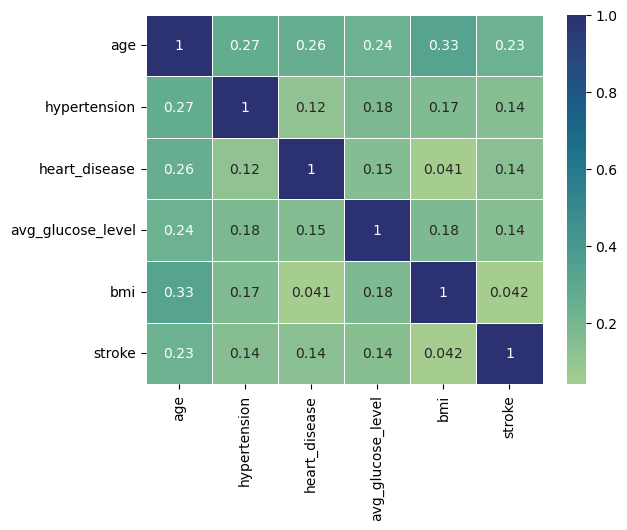

In [13]:
# Heat map to represent correlation between features
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap="crest")

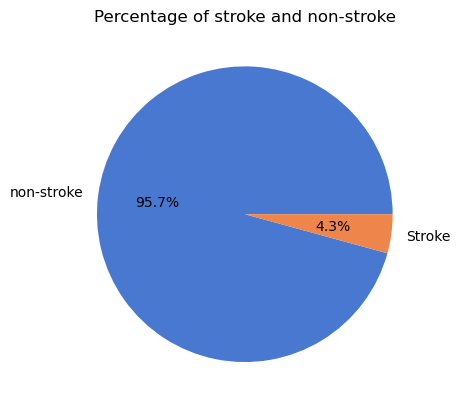

In [14]:
# pie chart to visualise percentages of patients who had stroke
plt.figure("Percentage of stroke and non-stroke")

labels = ['non-stroke', 'Stroke']
color = sns.color_palette('muted')

plt.pie(df['stroke'].value_counts(), labels=labels, autopct='%1.1f%%', colors=color)
plt.title("Percentage of stroke and non-stroke")
plt.show()

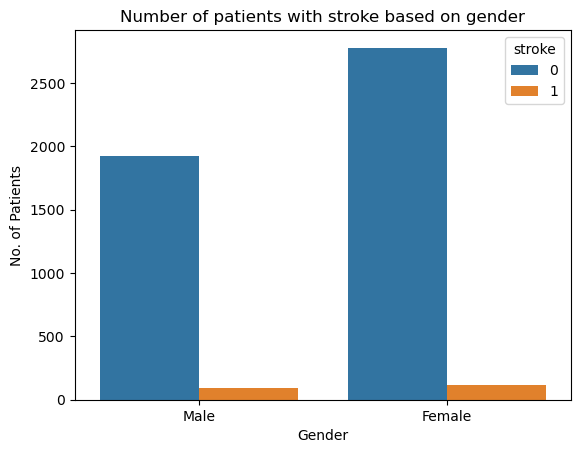

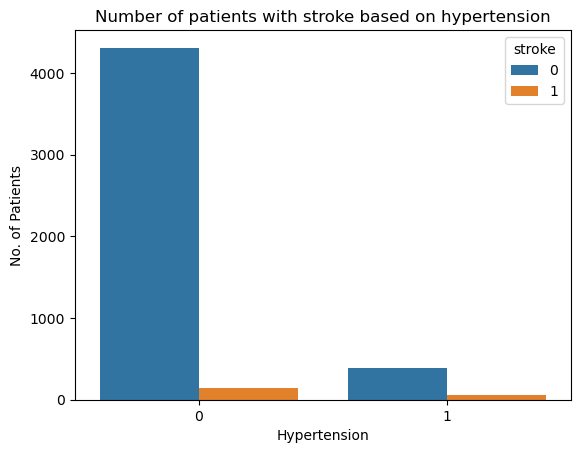

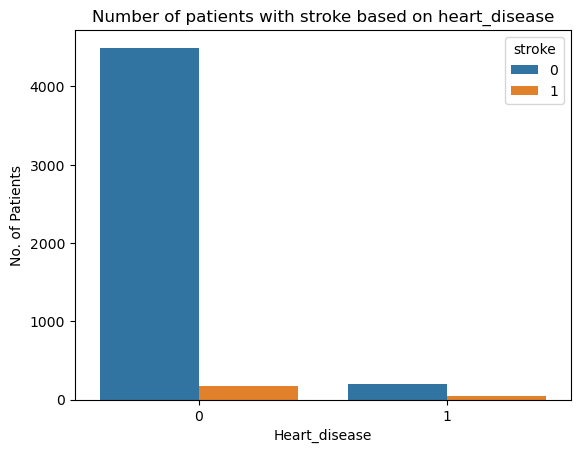

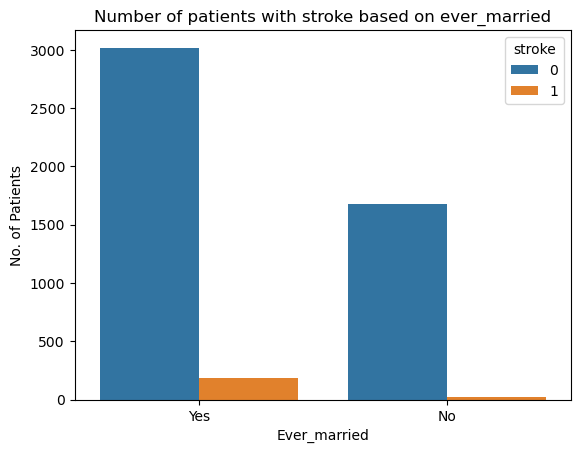

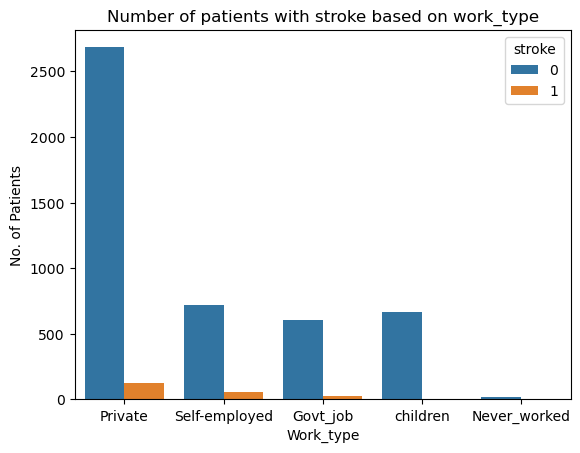

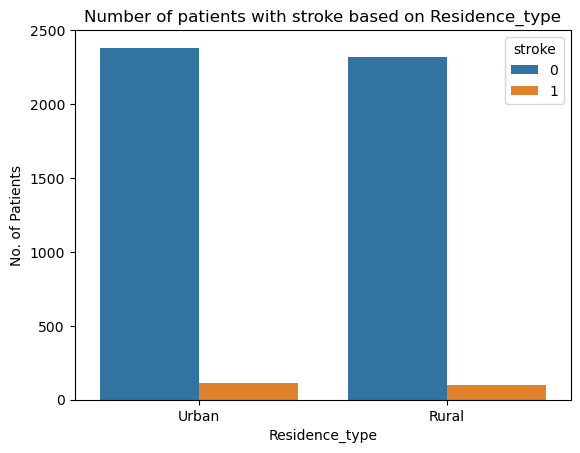

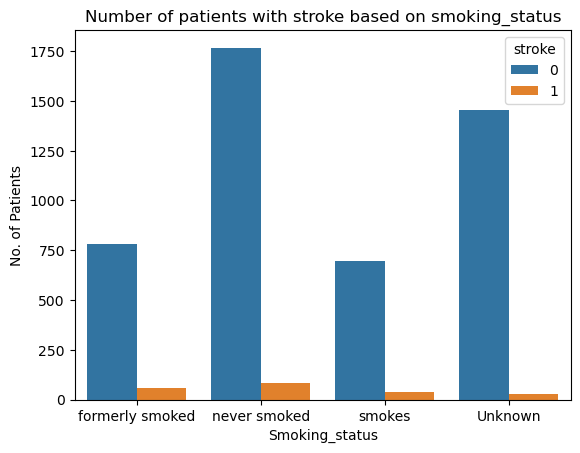

In [15]:
# A for loop to visualize all the categorical and boolean data with barcharts 
for i in df.drop(['stroke'], axis=1):                          # exclude stroke data
    if df[i].dtype == 'int64' or df[i].dtype == 'object':
        sns.countplot(data=df, x=i, hue='stroke')
        plt.title("Number of patients with stroke based on {0}".format(i))
        plt.xlabel(i.capitalize())
        plt.ylabel('No. of Patients')
        plt.show()

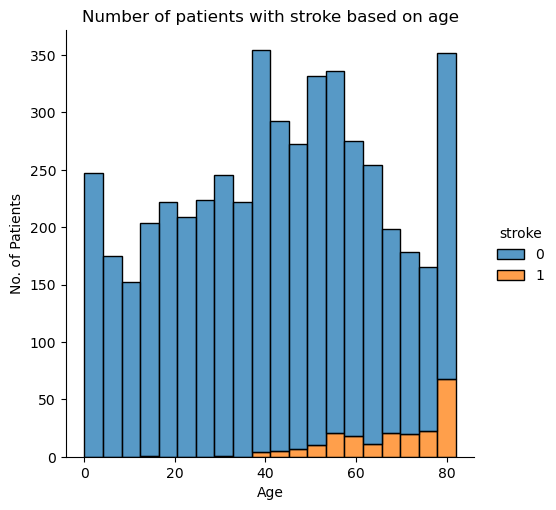

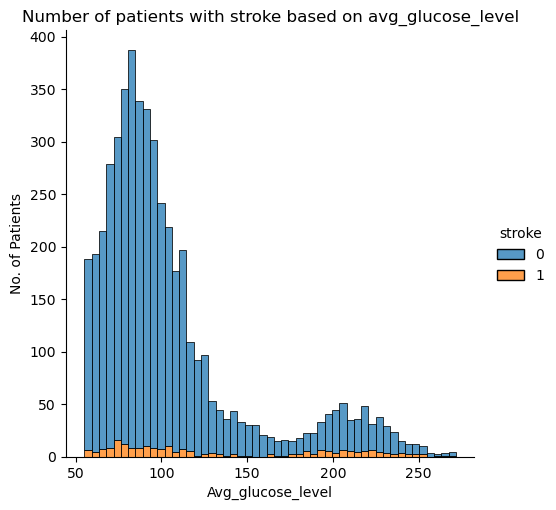

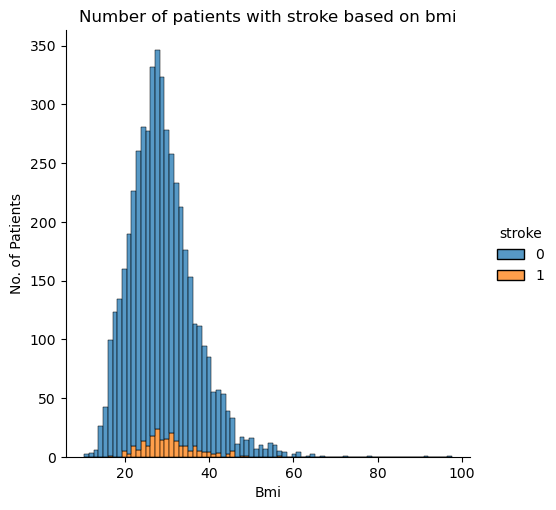

In [16]:
# visualizing numeric data 
for i in df.drop(['stroke'], axis=1):                          # exclude stroke data
    if df[i].dtype == 'float64':
        sns.displot(df, x=i, hue='stroke',  multiple="stack")
        plt.title("Number of patients with stroke based on {0}".format(i))
        plt.xlabel(i.capitalize())
        plt.ylabel('No. of Patients')
        plt.show()

# One-Hot-Encoding

In [19]:
# changing categorical features into 0 and 1 values
print("Original features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Features after get_dummies:\n", list(df_dummies.columns))

Original features:
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'] 

Features after get_dummies:
 ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [20]:
df_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [21]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   stroke                          4908 non-null   int64  
 6   gender_Female                   4908 non-null   uint8  
 7   gender_Male                     4908 non-null   uint8  
 8   ever_married_No                 4908 non-null   uint8  
 9   ever_married_Yes                4908 non-null   uint8  
 10  work_type_Govt_job              4908 non-null   uint8  
 11  work_type_Never_worked          4908 non-null   uint8  
 12  work_type_Private               49

In [22]:
# changing feature's data type to int64 
for i in df_dummies:
    df_dummies[i] = df_dummies[i].astype('int64')
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             4908 non-null   int64
 1   hypertension                    4908 non-null   int64
 2   heart_disease                   4908 non-null   int64
 3   avg_glucose_level               4908 non-null   int64
 4   bmi                             4908 non-null   int64
 5   stroke                          4908 non-null   int64
 6   gender_Female                   4908 non-null   int64
 7   gender_Male                     4908 non-null   int64
 8   ever_married_No                 4908 non-null   int64
 9   ever_married_Yes                4908 non-null   int64
 10  work_type_Govt_job              4908 non-null   int64
 11  work_type_Never_worked          4908 non-null   int64
 12  work_type_Private               4908 non-null   int64
 13  wor

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df_dummies.drop(['stroke'], axis=1), df_dummies['stroke'], random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=10000).fit(x_train, y_train)


In [25]:
print("Test score: {0:.4f}".format(LogReg.score(x_test,y_test)))
print("Traning score: {0:.4f}".format(LogReg.score(x_train,y_train)))

Test score: 0.9601
Traning score: 0.9568


In [26]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,),max_iter=5000).fit(x_train,y_train)

In [27]:
print("Test score: {0:.5f}".format(classifier.score(x_test,y_test)))
print("Traning score: {0:.5f}".format(classifier.score(x_train,y_train)))

Test score: 0.96088
Traning score: 0.95681


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
LogReg = LogisticRegression(max_iter=10000).fit(x_train_scaled, y_train)
print("Test score: {0:.4f}".format(LogReg.score(x_test_scaled,y_test)))
print("Traning score: {0:.4f}".format(LogReg.score(x_train_scaled,y_train)))

Test score: 0.9601
Traning score: 0.9568
